In [293]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [294]:
df = pd.read_csv('datasets\sales_2.csv')
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,Discount_Percent
0,100354678,01-10-2020,received,574772,oasis_Oasis-064-36,21,? 89.90,_ 1798 __,0.0,"$1,798.00",...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,0.0
1,100354678,01-10-2020,received,574774,Fantastic_FT-48,11,? 19.00,_ 190 __,0.0,$190.00,...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,0.0
2,100354680,01-10-2020,complete,574777,mdeal_DMC-610-8,9,? 149.90,_ 1199.2 __,0.0,"$1,199.20",...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,0.0
3,100354680,01-10-2020,complete,574779,oasis_Oasis-061-36,9,? 79.90,_ 639.2 __,0.0,$639.20,...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,0.0
4,100367357,13-11-2020,received,595185,MEFNAR59C38B6CA08CD,2,? 99.90,_ 99.9 __,0.0,$99.90,...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,0.0


In [295]:
df[df['Place Name'].isnull()][['Place Name','County','City']]

,Place Name,County,City
187,NaN,Dodge,Snyder


In [296]:
df[(df['County']=='Dodge')&(df['City']=='Snyder')]['Place Name'].mode()

0    Snyder
Name: Place Name, dtype: object

In [297]:
df.loc[187,'Place Name']='Snyder'

In [298]:
df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name', 'Gender', 'age', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region',
       'Discount_Percent'],
      dtype='object')

In [299]:
df[df['Phone No. '].isnull()]['SSN']

192    698-16-4181
Name: SSN, dtype: object

In [300]:
df[df['SSN']=="698-16-4181"]['Phone No. '].unique()

array(['308-392-2413', nan], dtype=object)

In [301]:
a=df[df['SSN']=="698-16-4181"]['Phone No. '].mode()

In [302]:
df.loc[192,'Phone No. ']=str(a)

In [303]:
df[df.County.isnull()]['City']

175    Drew
Name: City, dtype: object

In [304]:
df[df['City']=="Drew"]['County'].unique()

array(['Sunflower', nan], dtype=object)

In [305]:
z = df[df['City']=="Drew"]['County'].mode()

In [306]:
df.loc[175,'County'] = str(z)

In [307]:
df[df.State.isnull()]['City']

189    Snyder
Name: City, dtype: object

In [308]:
y = df[df['City']=="Snyder"]['State'].mode()


In [309]:
df.loc[189,'State']=str(y)

In [310]:
df[df['Zip'].isnull()]['City']

190    Snyder
Name: City, dtype: object

In [311]:
x=df[df['City']=="Snyder"]['Zip'].mode()

In [312]:
df.loc[df['Zip'].isnull(),'Zip']=float(x)

In [313]:
df.Zip = df.Zip.astype(int)

In [314]:
df.loc[df['Region'].isnull(),'Region']="Unknown"

In [315]:
df.loc[df['Discount_Percent'].isnull(),'Discount_Percent']=0

In [316]:
df['Customer Since'].fillna(method='ffill',inplace=True)

In [317]:
df.loc[df.age.isnull(),['age','payment_method','Gender']].T

,24,56
age,NaN,NaN
payment_method,Easypay,Payaxis
Gender,M,F


In [318]:
df.loc[24,'age'] = df[(df['payment_method']=='Easypay')&(df['Gender']=='M')]['age'].median()

In [319]:
df.loc[56,'age'] = df[(df['payment_method']=='Payaxis')&(df['Gender']=='F')]['age'].median()

In [320]:
df.loc[[24,56],['age','payment_method','Gender']].T

,24,56
age,50.0,56.0
payment_method,Easypay,Payaxis
Gender,M,F


In [321]:
df.total = df.total.str.replace("$","",regex = False)
df.total = df.total.str.replace(",","",regex = False)
df.total = pd.to_numeric(df['total'],errors="coerce")

In [322]:
df.price = df.price.str.replace("?","",regex = False)
df.price = df.price.str.replace(",","",regex = False)
df.price = pd.to_numeric(df['price'],errors = "coerce")
df.dropna(subset=['price'],inplace=True)

In [323]:

# Calculate the product of 'price' and 'qty_ordered'
calculated_total = df['price'] * df['qty_ordered']

# Use .fillna() to fill missing values in 'total'
df['total'].fillna(calculated_total, inplace=True)


In [324]:
desc=pd.DataFrame(index=list(df))
desc['count']=df.shape[0]
desc['null']=df.isnull().sum()
desc['dtype']=df.dtypes
desc['unique']= df.nunique()
desc['%unique'] = desc['unique']/len(df)
desc=pd.concat([desc,df.describe().T],axis=1)

In [325]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,14989,14990,14991,14992,14993,14994,14995,14996,14997,14998
order_id,100354678,100354678,100354680,100354680,100367357,100367357,100367360,100354677,100354677,100354677,...,100363990,100363990,100363990,100363990,100364007,100364007,100364007,100363995,100363995,100363995
order_date,01-10-2020,01-10-2020,01-10-2020,01-10-2020,13-11-2020,13-11-2020,13-11-2020,01-10-2020,01-10-2020,01-10-2020,...,11-11-2020,11-11-2020,11-11-2020,11-11-2020,11-11-2020,11-11-2020,11-11-2020,11-11-2020,11-11-2020,11-11-2020
status,received,received,complete,complete,received,received,order_refunded,canceled,canceled,canceled,...,complete,complete,complete,complete,complete,complete,complete,complete,complete,complete
item_id,574772,574774,574777,574779,595185,595186,595192,574769,574770,574771,...,590512,590513,590514,590515,590560,590561,590562,590524,590525,590526
sku,oasis_Oasis-064-36,Fantastic_FT-48,mdeal_DMC-610-8,oasis_Oasis-061-36,MEFNAR59C38B6CA08CD,MEFBUY59B7C3DDC2CA3-42,MATDAN59C3C845B38F0,GFE_19_USBLEDLight,oasis_Kingston-32GB-DTIG4,Geepas_GSB5420,...,LUX59D62CD25765C,LIF59D62CE49B2A2,SUR59D62D768E2F2,LUX59D62CE0DE4D2,LUX59D62CE0DE4D2,LIF59D62CE49B2A2,DOV59D62CD7D013F,LIF59D62CE49B2A2,DOV59D62CD7D013F,LUX59D62CE0DE4D2
qty_ordered,21,11,9,9,2,2,2,2,2,2,...,2,2,2,3,3,3,2,2,2,3
price,89.9,19.0,149.9,79.9,99.9,39.9,47.6,49.0,135.0,549.9,...,21.0,20.0,47.0,15.0,15.0,20.0,37.0,20.0,37.0,15.0
value,_ 1798 __,_ 190 __,_ 1199.2 __,_ 639.2 __,_ 99.9 __,_ 39.9 __,_ 47.6 __,_ 49 __,_ 135 __,_ 549.9 __,...,/ _ 21 __.,/ _ 20 __.,/ _ 47 __.,/ _ 30 __.,/ _ 30 __.,/ _ 40 __.,/ _ 37 __.,/ _ 20 __.,/ _ 37 __.,/ _ 30 __.
discount_amount,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,1798.0,190.0,1199.2,639.2,99.9,39.9,47.6,49.0,135.0,549.9,...,21.0,20.0,47.0,30.0,30.0,40.0,37.0,20.0,37.0,30.0


In [326]:
desc

,count,null,dtype,unique,%unique,count,mean,std,min,25%,50%,75%,max
order_id,14998,0,int64,9340,0.622750,14998.0,1.004164e+08,66971.949421,100354677.0,1.003577e+08,1.003845e+08,1.004621e+08,1.005624e+08
order_date,14998,0,object,361,0.024070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,14998,0,object,11,0.000733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_id,14998,0,int64,14998,1.000000,14998.0,6.755639e+05,107167.417381,574769.0,5.802512e+05,6.235315e+05,7.581170e+05,9.051990e+05
sku,14998,0,object,7459,0.497333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qty_ordered,14998,0,int64,24,0.001600,14998.0,2.898120e+00,3.177469,1.0,2.000000e+00,2.000000e+00,3.000000e+00,5.100000e+01
price,14998,0,float64,2381,0.158755,14998.0,5.600893e+02,1463.226777,0.0,3.260000e+01,9.600000e+01,4.645250e+02,1.012626e+05
value,14998,0,object,3633,0.242232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount_amount,14998,0,float64,1553,0.103547,14998.0,4.535206e+01,147.084761,0.0,0.000000e+00,0.000000e+00,5.000000e+00,3.000000e+03
total,14998,0,float64,3871,0.258101,14998.0,5.024908e+02,1343.548589,0.0,3.750000e+01,1.038400e+02,4.448400e+02,1.012626e+05


In [327]:
noise=[]
for i in df.value:
    try:
        float(i)
    except:
        noise.append(i)

In [328]:
pd.Series(noise)
# .shape[0]

0            _ 1798   __      
1             _ 190   __      
2          _ 1199.2   __      
3           _ 639.2   __      
4            _ 99.9   __      
                 ...          
14993             / _ 40   __.
14994             / _ 37   __.
14995             / _ 20   __.
14996             / _ 37   __.
14997             / _ 30   __.
Length: 14998, dtype: object

In [329]:
df.value = df.value.str.replace("_","",regex=False)
df.value = df.value.str.replace(" ","",regex=False)
df.value = df.value.str.replace("/","",regex=False)
df.value = df.value.str.rstrip(".").astype(float)

In [330]:
df.Name

0        {Name Prefix : Drs. , First Name : Jani , Midd...
1        {Name Prefix : Drs. , First Name : Jani , Midd...
2        {Name Prefix : Drs. , First Name : Jani , Midd...
3        {Name Prefix : Drs. , First Name : Jani , Midd...
4        {Name Prefix : Drs. , First Name : Jani , Midd...
                               ...                        
14994    {Name Prefix : Prof. , First Name : Norberto ,...
14995    {Name Prefix : Prof. , First Name : Norberto ,...
14996    {Name Prefix : Prof. , First Name : Norberto ,...
14997    {Name Prefix : Prof. , First Name : Norberto ,...
14998    {Name Prefix : Prof. , First Name : Norberto ,...
Name: Name, Length: 14998, dtype: object

In [331]:
df.Name = df.Name.str.replace("First Name","",regex=False)
df.Name = df.Name.str.replace("Name Prefix","",regex=False)
df.Name = df.Name.str.replace("Middle Initial","",regex=False)
df.Name = df.Name.str.replace("Last Name","",regex=False)
df.Name = df.Name.str.replace(":","",regex=False)
df.Name = df.Name.str.replace("{","",regex=False)
df.Name = df.Name.str.replace("}","",regex=False)
df.Name = df.Name.str.replace(" ","",regex=False)

In [332]:
df.Name = df.Name.str.split(",")

In [333]:
df[['Prefix','First_Name','Middle_Name','Last_Name']]=df['Name'].apply(pd.Series)

In [334]:
df.Prefix.unique()

array(['Drs.', 'Prof.', 'Mr.', 'Hon.', 'Ms.', 'Mrs.', 'Dr.'], dtype=object)

In [335]:
df.Last_Name.unique()

array(['Titus', 'Eaker', 'Simoneau', ..., 'Zucker', 'Harton', 'Leclair'],
      dtype=object)

In [336]:
df.Middle_Name.unique()

array(['W', 'S', 'G', 'X', 'U', 'T', 'K', 'E', 'Z', 'J', 'F', 'M', 'B',
       'O', 'D', 'N', 'A', 'Y', 'P', 'V', 'C', 'I', 'H', 'Q', 'R', 'L'],
      dtype=object)

In [337]:
df.drop(columns=['Name'],inplace=True)

In [338]:
df['Full_Name'] = df['Prefix'] + ' ' + df['First_Name']+' '+df['Middle_Name']+' '+df['Last_Name']

In [339]:
df.Full_Name

0               Drs. Jani W Titus
1               Drs. Jani W Titus
2               Drs. Jani W Titus
3               Drs. Jani W Titus
4               Drs. Jani W Titus
                   ...           
14994    Prof. Norberto K Leclair
14995    Prof. Norberto K Leclair
14996    Prof. Norberto K Leclair
14997    Prof. Norberto K Leclair
14998    Prof. Norberto K Leclair
Name: Full_Name, Length: 14998, dtype: object

In [340]:
age_bins=['0-20', '21-30', '31-40', '41-50', '51-60', '61-100']

In [341]:
df['age_bin'] = pd.cut(df['age'],bins=[0,20,30,40,50,60,100],labels=age_bins)

In [342]:
df[df['age']<30][['age','age_bin']]

,age,age_bin
7,28.0,21-30
8,28.0,21-30
9,28.0,21-30
10,28.0,21-30
11,28.0,21-30
...,...,...
14842,20.0,0-20
14871,19.0,0-20
14898,19.0,0-20
14903,26.0,21-30


unique customer count in each state

In [343]:
count = df.groupby('State')['cust_id'].nunique()

In [344]:
df['Prefix'].mode()

0    Mr.
Name: Prefix, dtype: object

In [345]:
df.status.unique()

array(['received', 'complete', 'order_refunded', 'canceled', 'refund',
       'cod', 'paid', 'processing', 'closed', 'pending', 'pending_paypal'],
      dtype=object)

In [346]:
df1=df[df['status']=='complete'].groupby('item_id')['total'].mean().reset_index()
df1

,item_id,total
0,574777,1199.2
1,574779,639.2
2,574792,530.0
3,574794,129.0
4,574796,345.0
...,...,...
4773,894864,22.5
4774,894866,28.9
4775,894868,87.0
4776,894870,29.0


In [347]:
df1['rank'] = df1['total'].rank(method = 'dense',ascending=False)

In [348]:
df1 = df1.sort_values(by = 'rank',ascending  = True)

In [349]:
df1

,item_id,total,rank
4399,787644,8624.97,1.0
4398,787639,8624.97,1.0
2972,668858,8528.90,2.0
2660,639638,7329.20,3.0
4011,751388,7205.60,4.0
...,...,...,...
4260,773080,0.00,1831.0
4259,773079,0.00,1831.0
4253,771760,0.00,1831.0
4280,774099,0.00,1831.0


In [350]:
df2=df.groupby('year')['total'].sum().reset_index()

In [351]:
df2

,year,total
0,2020,4572274.28
1,2021,2964082.25


<Axes: xlabel='year', ylabel='total'>

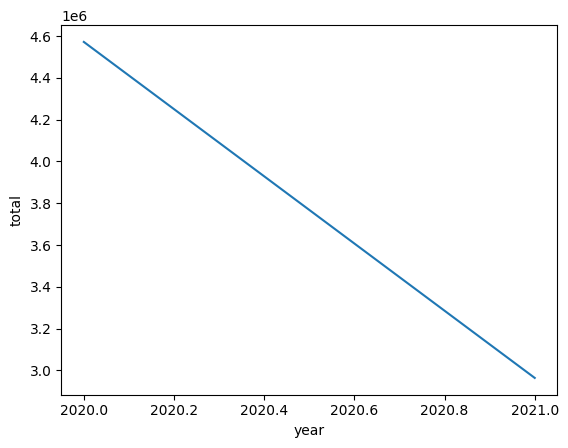

In [292]:
sns.lineplot(x=df2['year'],y=df2['total'])

In [355]:
cor = df['value'].corr(df['discount_amount'])

In [356]:
cor

0.41685846886552824

Text(0, 2500, 'Correlation: 0.42')

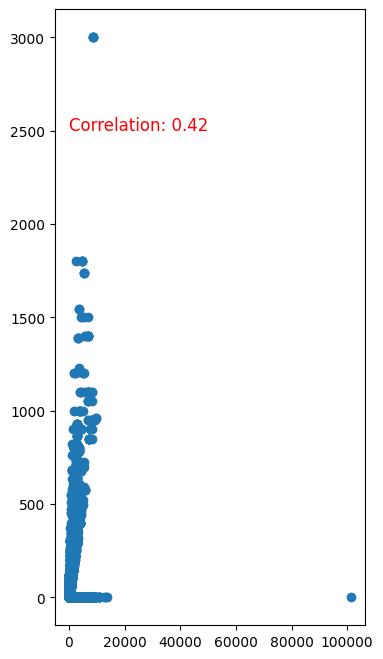

In [377]:
plt.figure(figsize=(4,8))
plt.scatter(x=df['value'],y=df['discount_amount'])

plt.text(0000, 2500, f'Correlation: {cor:.2f}', fontsize=12, color='red')

In [378]:
df3 = df.groupby('payment_method')['value'].mean().reset_index()

<BarContainer object of 12 artists>

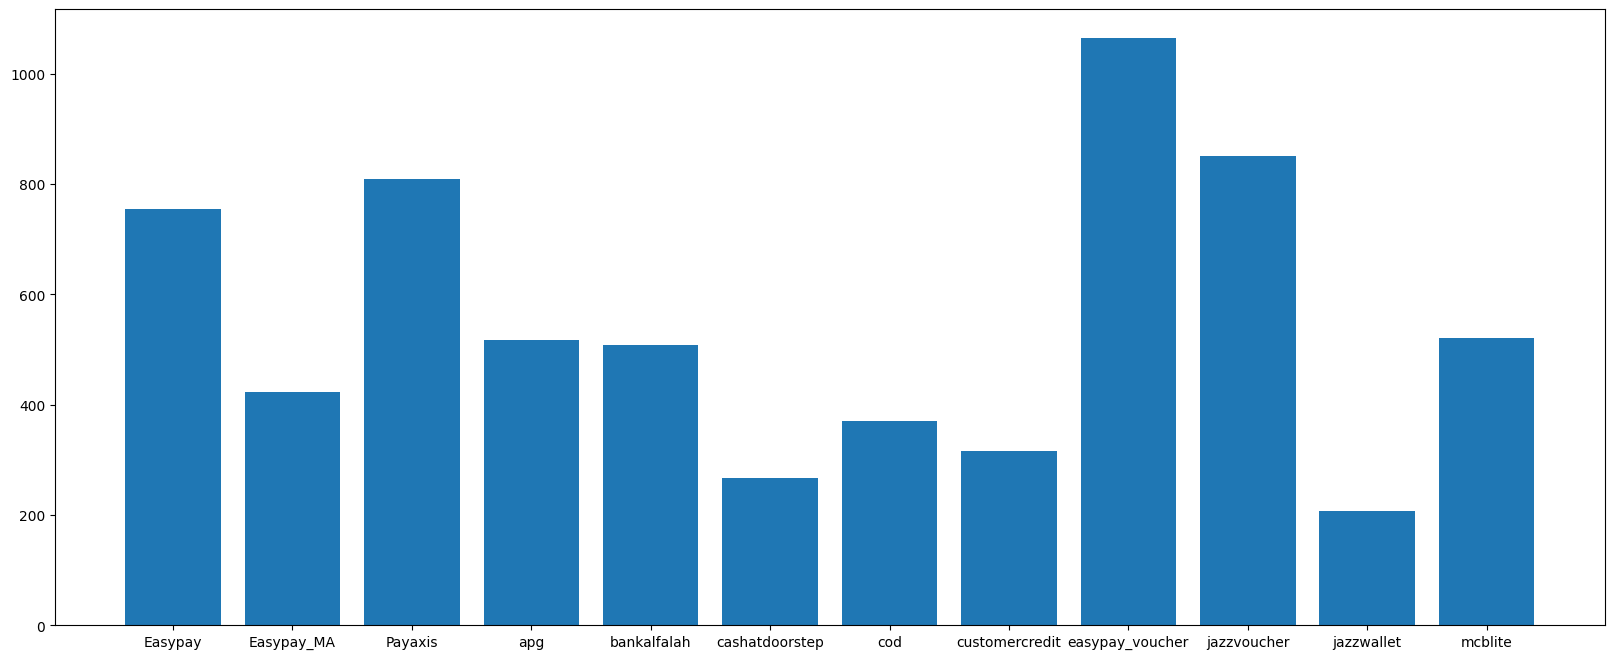

In [384]:
plt.figure(figsize=(20,8))
plt.bar(df3['payment_method'],df3['value'])